# (NOT COMPLETE) Computational Exercise 8: Text Pre-Processing

**Please note that (optionally) this exercise may be completed in groups of 2 students.**

---
In this exercise, we'll convert sections of medical abstracts (e.g. background, methods, etc) into feature vectors that we'll use in a subsequent exercise to develop and test a predictive model.

Goals of the exercise are as follows:

- See how raw text data is pre-processed to prepare it for modeling
- Further improve your understanding of count-based text features

We'll begin by importing the usual libraries as well as a new one, the **natural language toolkit (nltk)**, which will help us preprocess our text data:

- numpy for efficient math operations
- pandas for data and dataframe manipulations
- matplotlib for visualization/plotting
- **nltk for text pre-processing**
- requests to load data from url

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

!pip install nltk
import nltk

We'll be working with the "PubMed 200k RCT dataset" dataset developed by Franck Dernoncourt. This dataset contains sentences found in Pubmed abstracts labeled as:

- OBJECTIVE
- BACKGROUND
- METHODS
- RESULTS
- CONCLUSIONS

Our goal is to develop a classifier that assigns sentences to the correct label. This is not a very useful classifier, but shows that natural language processing is effective even for text with complex terminology, including clinical notes. The training, validation, and test data are found at the following addresses:

In [1]:
train_url = 'https://github.com/Franck-Dernoncourt/pubmed-rct/raw/master/PubMed_20k_RCT/train.txt?raw=true'
val_url = 'https://github.com/Franck-Dernoncourt/pubmed-rct/raw/master/PubMed_20k_RCT/dev.txt?raw=true'
test_url = 'https://github.com/Franck-Dernoncourt/pubmed-rct/raw/master/PubMed_20k_RCT/test.txt?raw=true'

We'll define a function to read these data. **The details here are *not* important to our goals;** we just need the data. For now, we'll load only the training data (as `sentences` and `labels`), but in later exercises, we'll reuse these addresses and the function below to load the validation and test sets as well.

In [5]:
import requests

def read_pubmed_rct(url):

    labels = []
    sentences = []
    
    with requests.get(url) as r:
        for line in r.iter_lines():
            fields = line.decode('utf-8').strip().split('\t')
            if len(fields) == 2:
                labels.append(fields[0])
                sentences.append(fields[1])
                
    return sentences, labels

sentences, labels = read_pubmed_rct(train_url)

print('There are %i sentences in the training set' % len(sentences))

There are 180040 sentences in the training set


Now let's take a look at the labels in the training set:

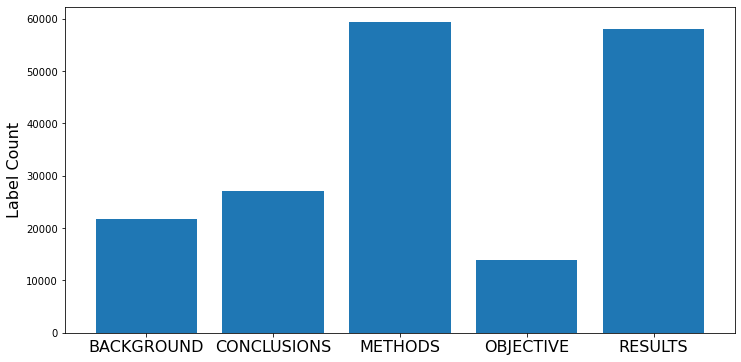

In [17]:
lbl, count = np.unique(labels, return_counts=True)
plt.figure(figsize=(12, 6))
plt.bar(np.arange(5), count)
plt.xticks(np.arange(5), lbl, fontsize=16)
plt.ylabel('Label Count', fontsize=16)
plt.show()

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/mme/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/mme/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
word_tokenize(sentences[0])

['To',
 'investigate',
 'the',
 'efficacy',
 'of',
 '6',
 'weeks',
 'of',
 'daily',
 'low-dose',
 'oral',
 'prednisolone',
 'in',
 'improving',
 'pain',
 ',',
 'mobility',
 ',',
 'and',
 'systemic',
 'low-grade',
 'inflammation',
 'in',
 'the',
 'short',
 'term',
 'and',
 'whether',
 'the',
 'effect',
 'would',
 'be',
 'sustained',
 'at',
 '12',
 'weeks',
 'in',
 'older',
 'adults',
 'with',
 'moderate',
 'to',
 'severe',
 'knee',
 'osteoarthritis',
 '(',
 'OA',
 ')',
 '.']

In [26]:
def process_sentence(sentence):
    word_list = word_tokenize(sentence)
    word_list = [w.lower() for w in word_list if w.isalpha()]
    return [w for w in word_list if w not in stop_words]

In [25]:
process_sentence(sentences[0])

['investigate',
 'efficacy',
 'weeks',
 'daily',
 'oral',
 'prednisolone',
 'improving',
 'pain',
 'mobility',
 'systemic',
 'inflammation',
 'short',
 'term',
 'whether',
 'effect',
 'would',
 'sustained',
 'weeks',
 'older',
 'adults',
 'moderate',
 'severe',
 'knee',
 'osteoarthritis',
 'oa']

Exercise 1: create the vocabulary using np.unique (take a look at common and uncommon words)
Exercise 2: 

As we move toward a classification model, we'll need to convert all of our labels to numbers that we can give to our classifier. Let's make sure to number them in the order we'd expect:

1. BACKGROUND
2. OBJECTIVE
3. METHODS
4. RESULTS
5. CONCLUSIONS

We'll do this using the dictionary `label_dict`.

In [5]:
label_dict = {'BACKGROUND': 0, 'OBJECTIVE': 1, 'METHODS': 2, 'RESULTS': 3, 'CONCLUSIONS': 4}

def labels_to_indices(labels):
    return np.array([label_dict[l] for l in labels])

y_train = labels_to_indices(l_train)
y_val = labels_to_indices(l_val)
y_test = labels_to_indices(l_test)

## Pre-Processing

Now let's start preparing our sentences for modeling. We'll use a very simple preprocessing pipline that:

1. tokenizes the sentence, which primarily involves splitting the sentence based on spaces. Here we're using NLTK's `word_tokenize()` function.
1. removes stop words (e.g. 'a', 'the')
2. removes tokens with non-alphabetical characters (via `word.isalpha()`)
3. converts words to lowercase (via `word.lower()`)

We can run the whole pipeline on the sentence `test_sentence` by calling `tokenize(test_sentence)`. Take a moment to explore different test sentences and check the result!

In [6]:
def tokenize(sentence):
    return [w.lower() for w in word_tokenize(sentence) if ((not w.lower() in stop_words) and w.isalpha())]

test_sentence = 'Here\'s a sentence we\'d like to tokenize.'

print('Sentence:')
print(test_sentence)
print('\nTokenized Sentence:')
print(tokenize(test_sentence))

Sentence:
Here's a sentence we'd like to tokenize.

Tokenized Sentence:
['sentence', 'like', 'tokenize']


Note that *a*, *we'd*, and *to* have been removed. This is because they're not very useful for the purpose of classifying the text. If we're satisfied our preprocessing is working as intended, we can apply it to all of the sentences in our training, validation, and test sets. This might take a few moments.

In [7]:
tokens_train = [tokenize(s) for s in s_train]
tokens_val = [tokenize(s) for s in s_val]
tokens_test = [tokenize(s) for s in s_test]

Now, let's define our vocabulary (as `vocab`) based on the words we encounter in our training set. Currently, we're only including words in our vocabulary if we see them at least 100 times (specified via `min_word_count = 100`). Let's leave it this way for now, but you may want to revisit this choice later in the exercise.

In [8]:
min_word_count = 100

words, counts = np.unique([word for tokens in tokens_train for word in tokens], return_counts=True)
vocab = words[counts > min_word_count]
vocab_dict = {word:idx for idx, word in enumerate(vocab)}

print('Obtained %i vocabulary words. Here are the first 50:\n' % len(vocab))
print(vocab[:50])
print('\nAnd here are the last 50:\n')
print(vocab[-50:])

Obtained 2948 vocabulary words. Here are the first 50:

['aa' 'abdominal' 'ability' 'ablation' 'able' 'abnormal' 'abnormalities'
 'absence' 'absolute' 'absorption' 'abstinence' 'abuse' 'academic'
 'acceptability' 'acceptable' 'acceptance' 'accepted' 'access'
 'accompanied' 'according' 'account' 'accuracy' 'accurate' 'acetaminophen'
 'acetate' 'achieve' 'achieved' 'achievement' 'achieving' 'acid' 'acids'
 'acl' 'acquired' 'acquisition' 'across' 'acs' 'act' 'action' 'activation'
 'active' 'activities' 'activity' 'actual' 'acuity' 'acupoint' 'acupoints'
 'acupuncture' 'acute' 'ad' 'adalimumab']

And here are the last 50:

['washout' 'water' 'wave' 'way' 'website' 'week' 'weekly' 'weeks' 'weight'
 'well' 'western' 'whereas' 'whether' 'white' 'whole' 'whose' 'wide'
 'widely' 'width' 'wilcoxon' 'withdrawal' 'within' 'without' 'wk' 'women'
 'work' 'workers' 'working' 'world' 'worldwide' 'worse' 'worsening'
 'would' 'wound' 'wrist' 'written' 'x' 'year' 'years' 'yet' 'yield'
 'yielded' 'yoga' '

Having defined our vocabulary, we can now count vocabulary words in each sentence of our data. Once this is done, we'll be just about ready to build our first model. The `word_counts()` function below will take our training dataset and vocabulary and return an $N \times V$ matrix of counts, where $N$ is the number of sentences, and $V$ is the size of our vocabulary. When we encounter vocabulary word $j$ in sentence $i$, we increment the $\{i, j\}^{th}$ element of the counts matrix by one.

In [9]:
def word_counts(tokens_list, vocab_dict):   
    vocab_words = vocab_dict.keys()
    counts = np.zeros((len(tokens_list), len(vocab_words)))
    for idx, tokens in enumerate(tokens_list):
        for token in tokens:
            if token in vocab_words:
                counts[idx, vocab_dict[token]] += 1
    return counts

counts_train = word_counts(tokens_train, vocab_dict).astype(np.float16)
counts_val = word_counts(tokens_val, vocab_dict).astype(np.float16)
counts_test = word_counts(tokens_test, vocab_dict).astype(np.float16)

As a last step before modeling, we'll apply tf-idf. Note that this is implemented just as described in class, except we are 'smoothing' by adding 1s in both the tf and idf steps. This 'smoothing' step is done partly to ensure we're never dividing by zero.

It is also important to note, as discussed in class, that we use only the training data when calculating our document frequency values. This is because we want to make sure we're normalizing all three sets (training, validation, and test) by the same document frequency, but we cannot use information outside of the training partition when we normalize it (*why?*).

Our data is now ready for modeling: we have `x_train`, `x_val`, and `x_test` along with the corresponding $y$ values.

In [10]:
def term_freq(counts):
    row_totals = np.sum(counts, axis=1) + 1
    assert np.amin(row_totals) > 0
    return counts / row_totals[:, np.newaxis]

def document_freq(counts):
    col_totals = np.sum((counts > 0).astype('int'), axis=0) + 1
    assert np.amin(col_totals) > 0
    return col_totals[np.newaxis, :] / (len(counts) + 1)

df = document_freq(counts_train)

x_train = term_freq(counts_train) / df
x_val = term_freq(counts_val) / df
x_test = term_freq(counts_test) / df